<a href="https://colab.research.google.com/github/ankitkarmakar95/learnings/blob/Data-science/Fitbitmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
fitbit=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FitbitTracker.xlsx')

In [20]:
fitbit.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,25,13,328,728,1985
1,21,19,217,776,1797
2,30,11,181,1218,1776
3,29,34,209,726,1745
4,36,10,221,773,1863


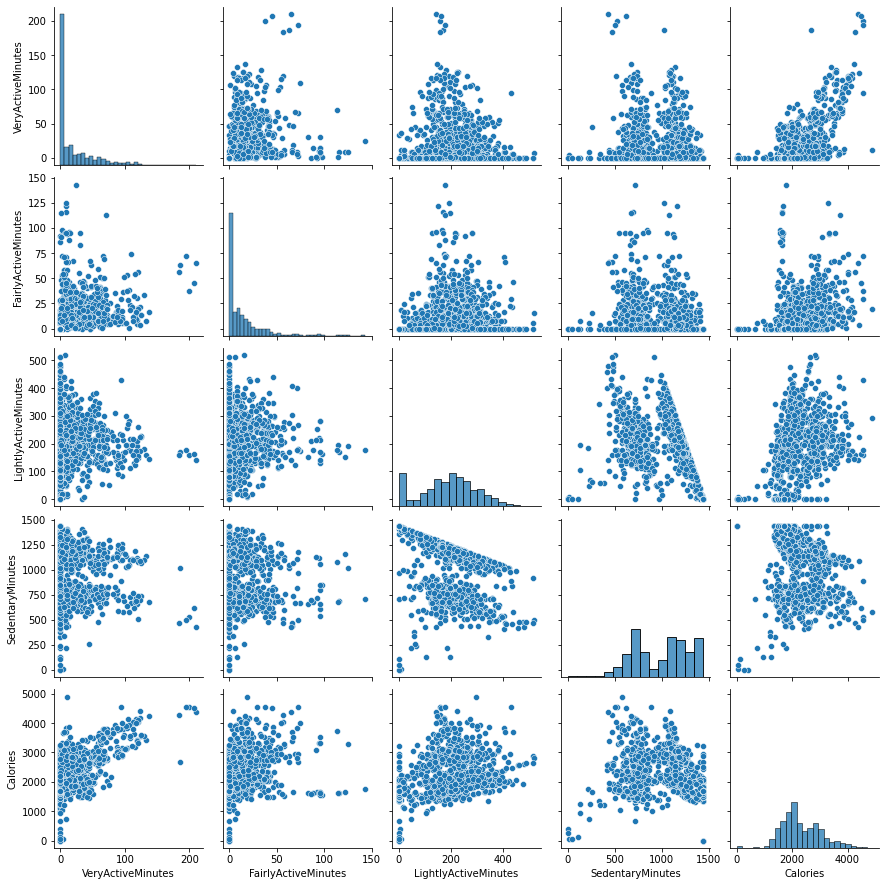

In [21]:
# Visualizing data
import seaborn as sns
sns.pairplot(fitbit)


Text(0.5, 0, 'Calories')

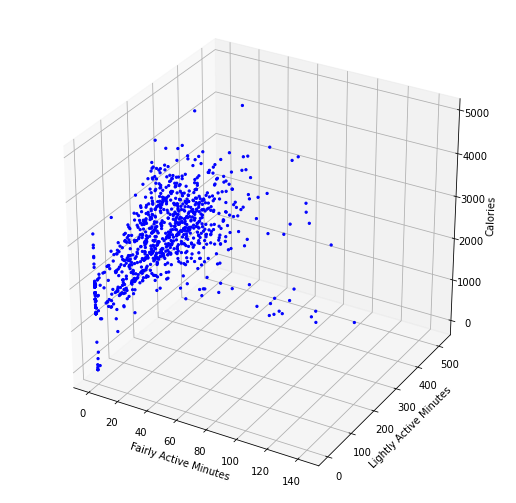

In [22]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = fitbit["FairlyActiveMinutes"], ys = fitbit["LightlyActiveMinutes"], zs=fitbit["Calories"],
           c='blue',
           alpha=1,
           marker='.')
ax.set_xlabel("Fairly Active Minutes")
ax.set_ylabel("Lightly Active Minutes")
ax.set_zlabel("Calories")

In [23]:
model = LinearRegression()
train, test = train_test_split(fitbit,test_size=0.30,train_size=0.70)
X = train[["FairlyActiveMinutes","LightlyActiveMinutes"]]
Y = train["Calories"]
model.fit(X,Y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 1869.6406733310787 
Coefficients: [7.97147445 1.72559157]


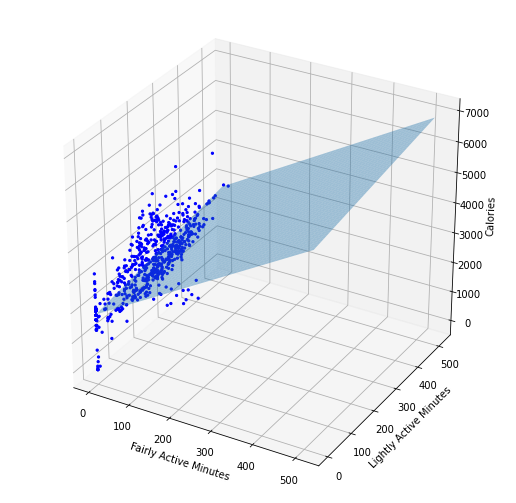

In [24]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = train["FairlyActiveMinutes"], ys = train["LightlyActiveMinutes"], zs=train["Calories"],
           c='blue',
           alpha=1,
           marker='.')
ax.set_xlabel("Fairly Active Minutes")
ax.set_ylabel("Lightly Active Minutes")
ax.set_zlabel("Calories")
x_surf = np.arange(train["FairlyActiveMinutes"].min(), train["LightlyActiveMinutes"].max(), 1) 
y_surf = np.arange(train["FairlyActiveMinutes"].min(), train["LightlyActiveMinutes"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'FairlyActiveMinutes': x_surf.ravel(), 'LightlyActiveMinutes': y_surf.ravel()})
out = model.predict(X_mesh)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4)